<a href="https://colab.research.google.com/github/ssssssshy/project/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('wholesome_customers_data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


<Axes: xlabel='Milk', ylabel='Grocery'>

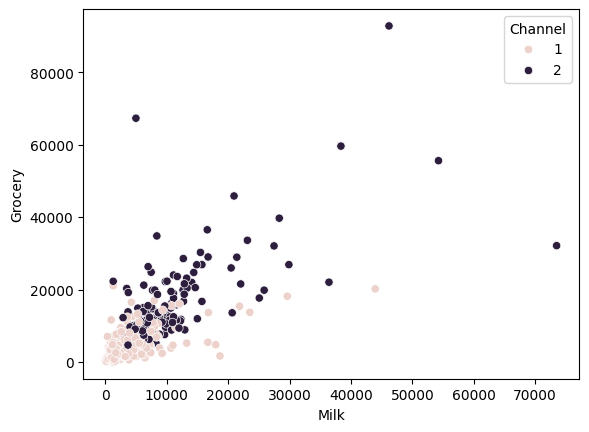

In [6]:
sns.scatterplot(data=df,x = 'Milk',y = 'Grocery', hue = 'Channel')

<Axes: xlabel='Milk', ylabel='Count'>

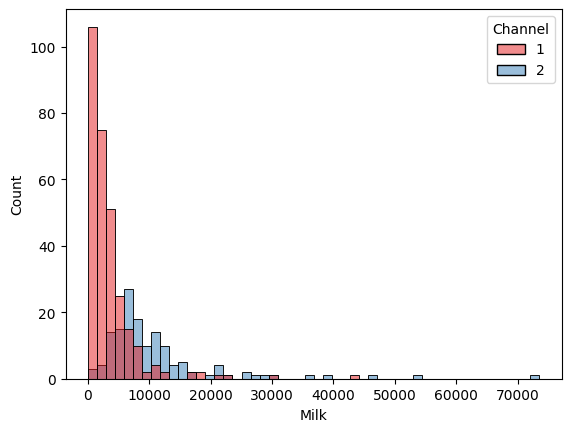

In [12]:
sns.histplot(data = df, x='Milk', hue = 'Channel',palette='Set1')

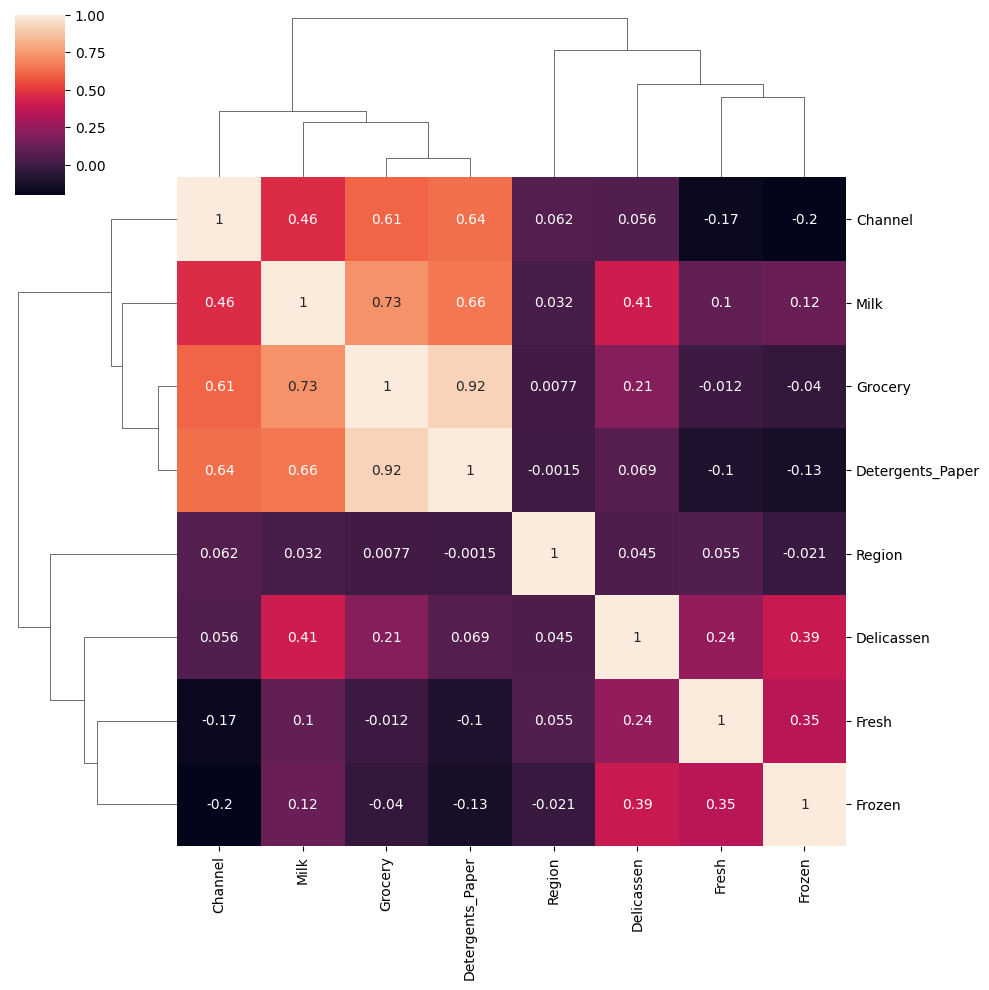

In [14]:
sns.clustermap(data=df.corr(), annot = True)

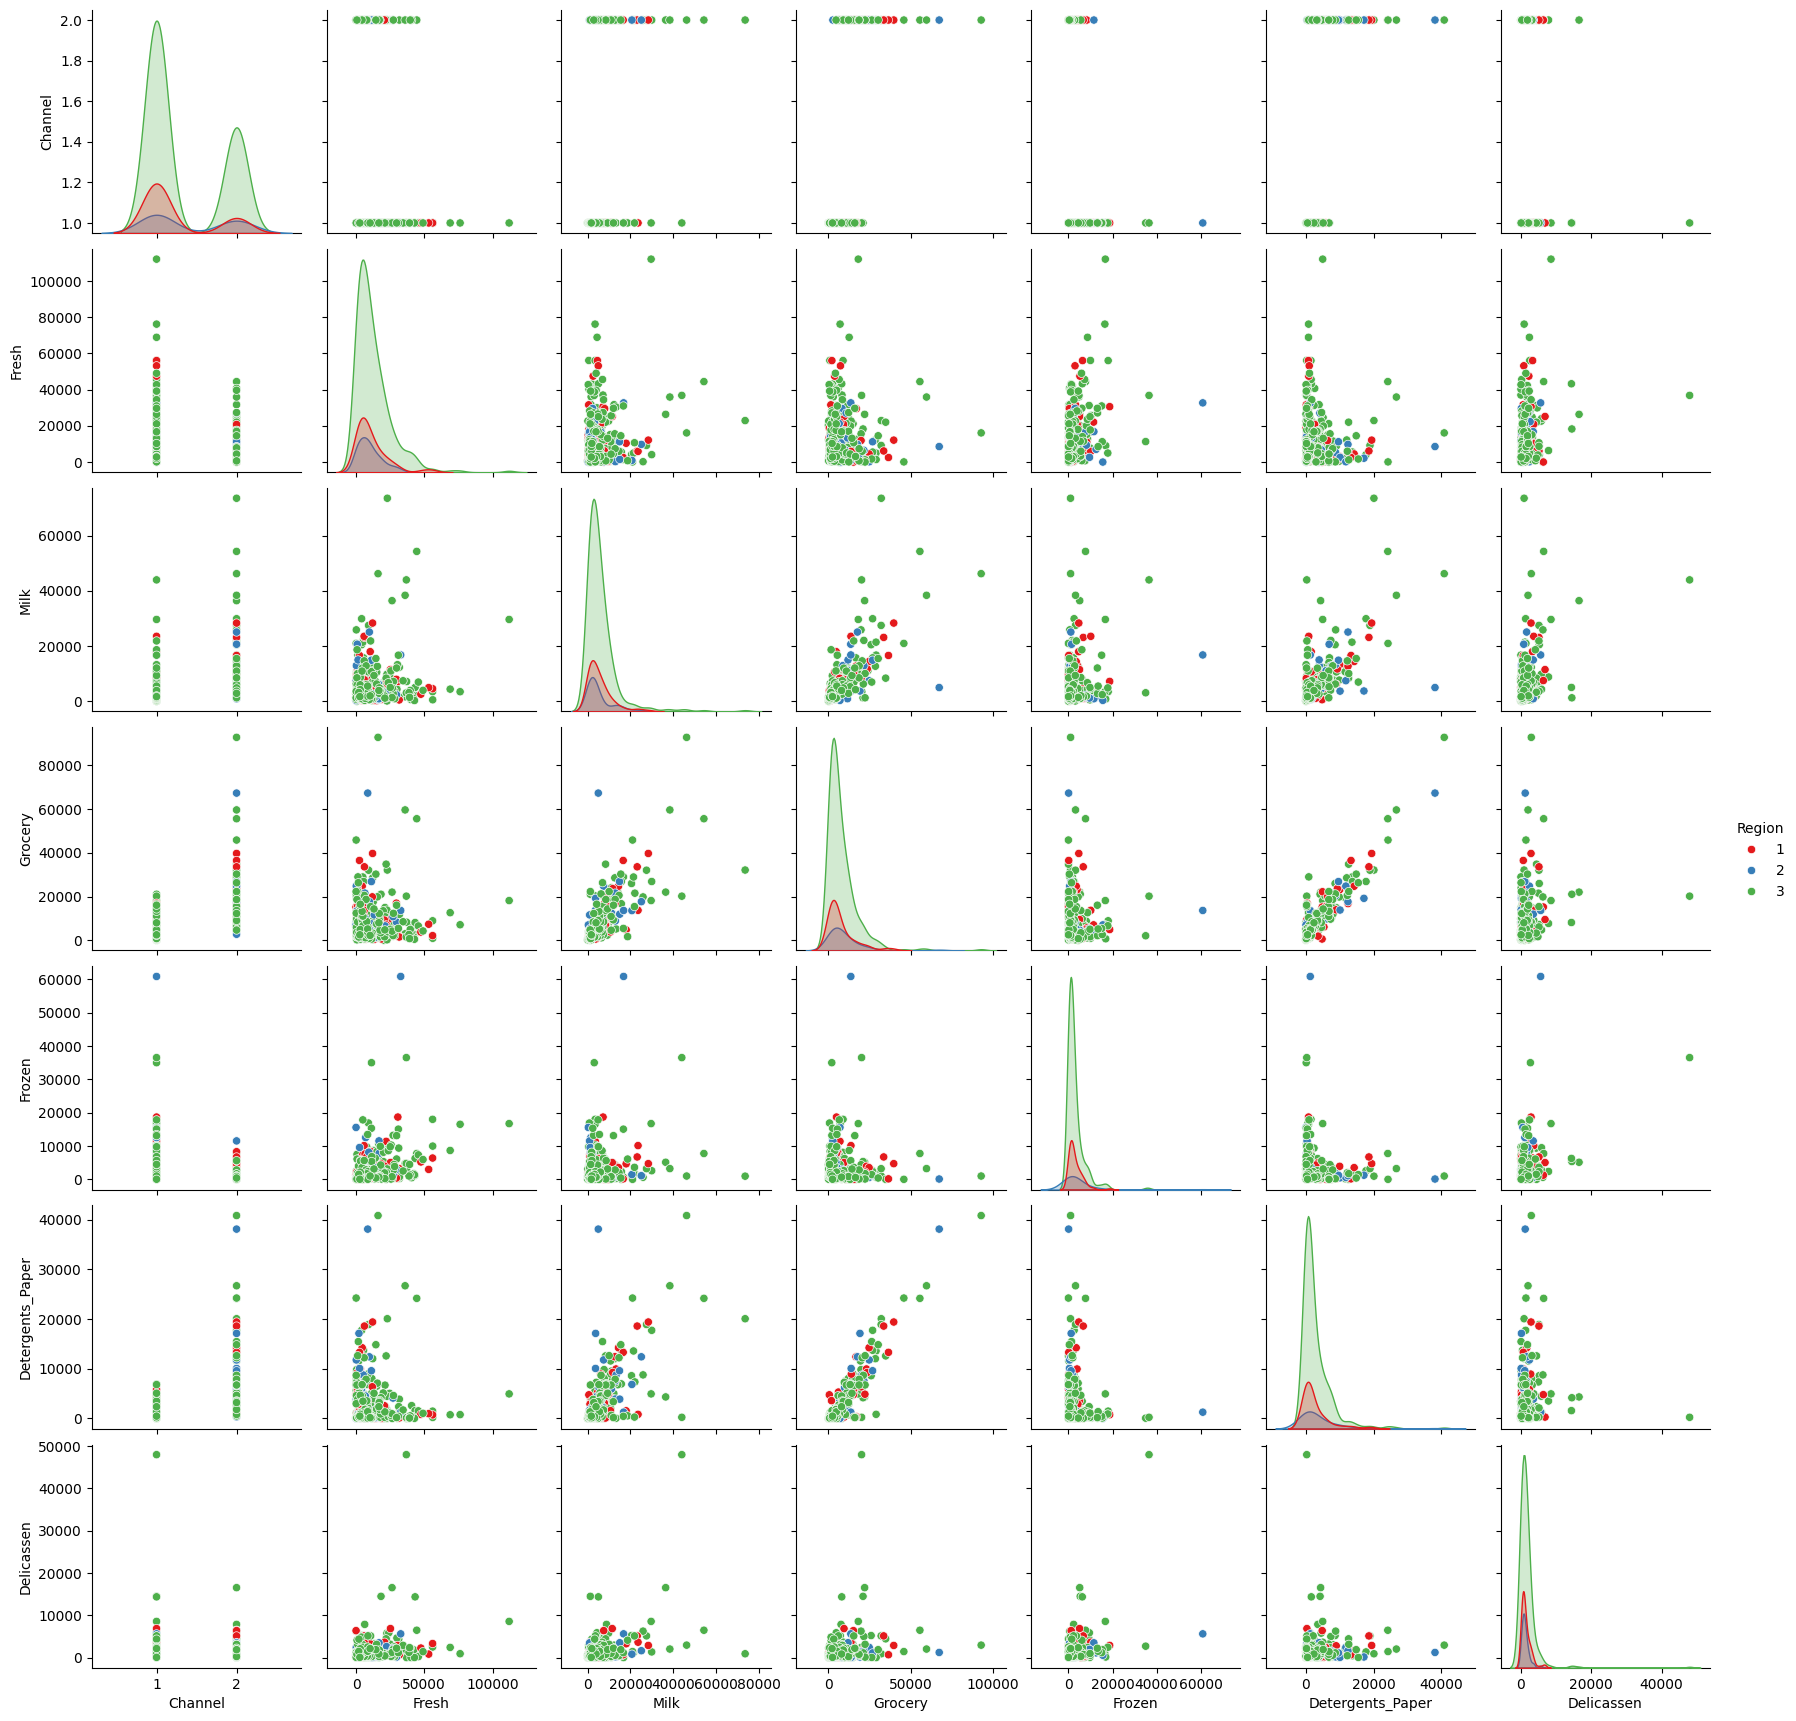

In [16]:
sns.pairplot(data = df, hue = 'Region', palette='Set1')

In [19]:
scaler = StandardScaler()

In [22]:
scaler_data = scaler.fit_transform(df)

In [23]:
scaler_data

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [28]:
spisok = []

for eps in np.linspace(0.001,3,50):
  model = DBSCAN(eps = eps, min_samples=2*scaler_data.shape[1])
  pred = model.fit(scaler_data)


  persent_outliers = 100*np.sum(model.labels_==-1) / len(model.labels_)
  spisok.append(persent_outliers)

In [29]:
spisok

[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 96.13636363636364,
 85.68181818181819,
 81.81818181818181,
 76.36363636363636,
 73.63636363636364,
 70.45454545454545,
 65.0,
 56.81818181818182,
 47.95454545454545,
 39.54545454545455,
 32.5,
 27.954545454545453,
 24.545454545454547,
 22.272727272727273,
 20.90909090909091,
 20.227272727272727,
 19.318181818181817,
 17.954545454545453,
 15.0,
 14.318181818181818,
 12.5,
 10.681818181818182,
 10.227272727272727,
 8.181818181818182,
 7.7272727272727275,
 7.045454545454546,
 6.590909090909091,
 6.136363636363637,
 5.2272727272727275,
 4.7727272727272725,
 4.7727272727272725,
 4.545454545454546,
 4.090909090909091,
 3.8636363636363638,
 3.6363636363636362,
 3.6363636363636362,
 3.1818181818181817,
 3.1818181818181817,
 3.1818181818181817,
 3.1818181818181817,
 3.1818181818181817,
 2.9545454545454546,
 2.9545454545454546,
 2.727272727272727,
 2.727272727272727]

<Axes: >

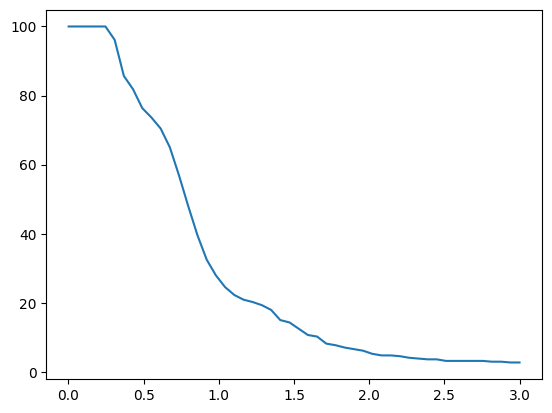

In [36]:
sns.lineplot(x=np.linspace(0.001,3,50),y=spisok)


In [38]:
model = DBSCAN(eps = 2, min_samples=2*scaler_data.shape[1])

In [39]:
model.fit(scaler_data)

DBSCAN(eps=2, min_samples=16)

<Axes: xlabel='Milk', ylabel='Grocery'>

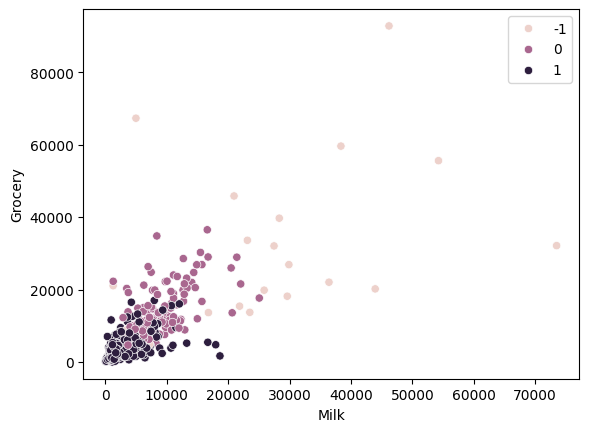

In [40]:
sns.scatterplot(data=df,x = 'Milk',y = 'Grocery', hue = model.labels_)

<Axes: xlabel='Milk', ylabel='Detergents_Paper'>

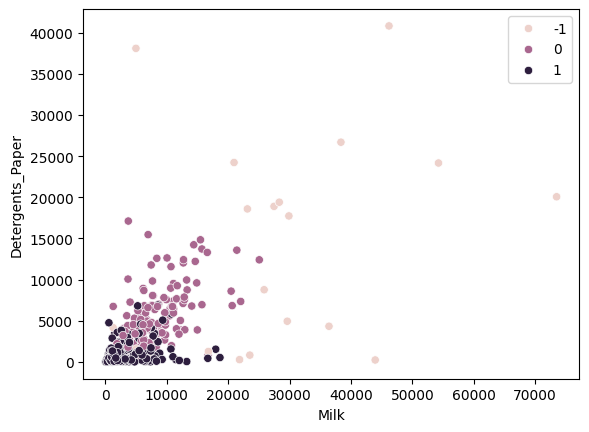

In [41]:
sns.scatterplot(data=df,x = 'Milk',y = 'Detergents_Paper', hue = model.labels_)

In [42]:
df['labels'] = model.labels_

In [43]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


In [46]:
cats = df.groupby(df['labels']).mean()

In [47]:
cats

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,,,
-1,1.52,2.480000,27729.920000,22966.960000,26609.600000,11289.640000,11173.560000,6707.160000
0,2.00,2.620155,8227.666667,8615.852713,13859.674419,1447.759690,5969.581395,1498.457364
1,1.00,2.513986,12326.972028,3023.559441,3655.328671,3086.181818,763.783217,1083.786713


<Axes: ylabel='labels'>

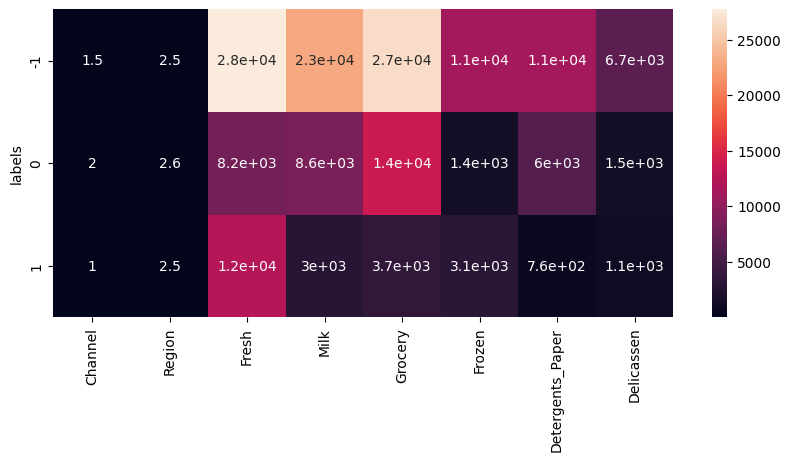

In [50]:
plt.figure(figsize=(10,4))
sns.heatmap(cats,annot = True)